<a href="https://colab.research.google.com/github/venkateshakula1729/BSE662-Course-Project-Foraging-Based/blob/master/Forging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install MNE version 1.8
!pip install mne==1.8.0


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 53.9 MB/s eta 0:00:00


In [2]:
# Import required libraries
import mne
import matplotlib.pyplot as plt

Loading 31730.set ...
Loading 43000.set ...
Loading 47131.set ...
Loading 47204.set ...
Loading 47324.set ...
Loading 48238.set ...
Plotting PSD of the raw data...
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).


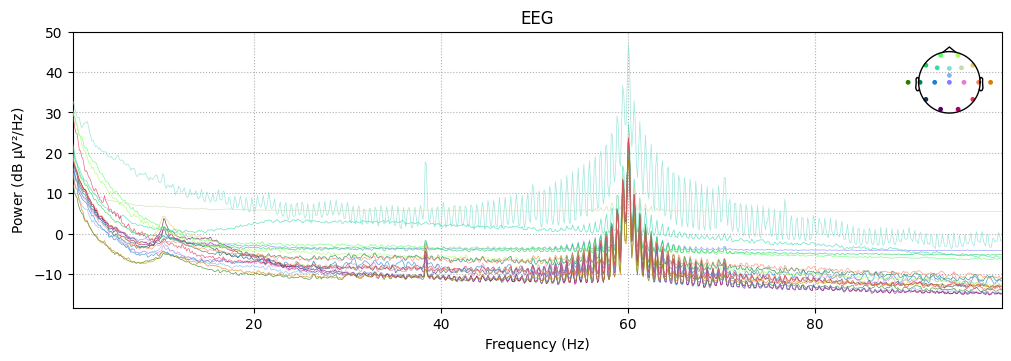

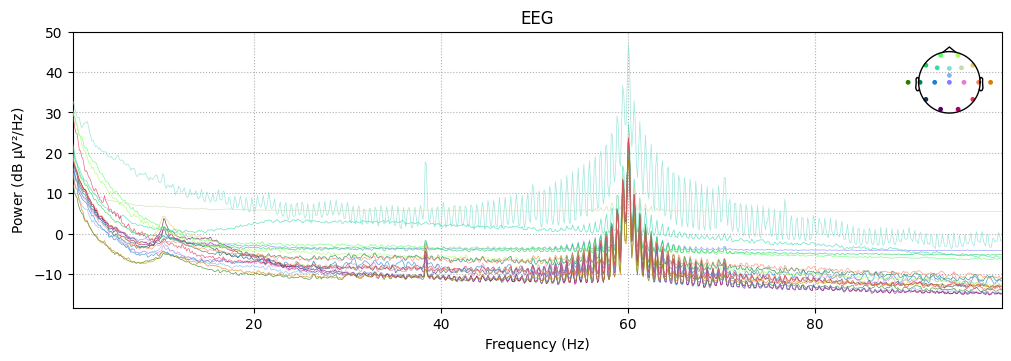

In [4]:

# Define the list of set files
set_files = ['31730.set', '43000.set', '47131.set', '47204.set', '47324.set', '48238.set']

# Load each .set file into an MNE Raw object
raw_list = []
for fname in set_files:
    print(f"Loading {fname} ...")
    raw = mne.io.read_raw_eeglab(fname, preload=True)
    raw_list.append(raw)

# For demonstration, we will process the first file in the list
raw = raw_list[0]

# -------------------------------
# STEP 1: Plot PSD of the raw data
# -------------------------------
print("Plotting PSD of the raw data...")
raw.plot_psd(fmin=0.5, fmax=100, show=True)




In [5]:

# -------------------------------
# STEP 2: Clean the data
#   2.1. Since line noise is known to be 60 Hz in America, we directly apply a notch filter.
# -------------------------------
print("Applying notch filter at 60 Hz to remove line noise...")
raw_clean = raw.copy().notch_filter(freqs=[60], verbose=False)


# -------------------------------
#   2.2. We apply a bandpass filter between 0.5 and 90 Hz.
# -------------------------------
print("Applying bandpass filter (0.5 - 90 Hz) on the cleaned data...")
raw_clean.filter(l_freq=0.5, h_freq=90, verbose=False)



Applying notch filter at 60 Hz to remove line noise...
Applying bandpass filter (0.5 - 90 Hz) on the cleaned data...


<RawEEGLAB | 31730.set, 19 x 1322500 (5290.0 s), ~191.7 MB, data loaded>

Plotting PSD of the cleaned data...
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).


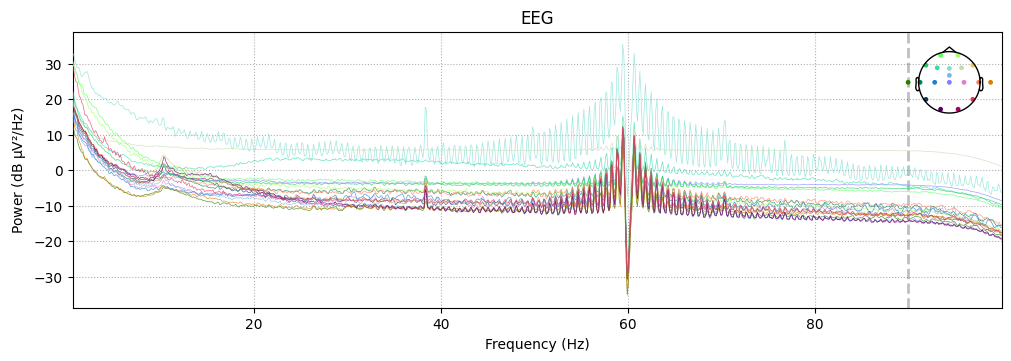

In [6]:

# -------------------------------
# STEP 3: Plot the PSD of the cleaned data
# -------------------------------
print("Plotting PSD of the cleaned data...")
raw_clean.plot_psd(fmin=0.5, fmax=100, show=True)

plt.show()